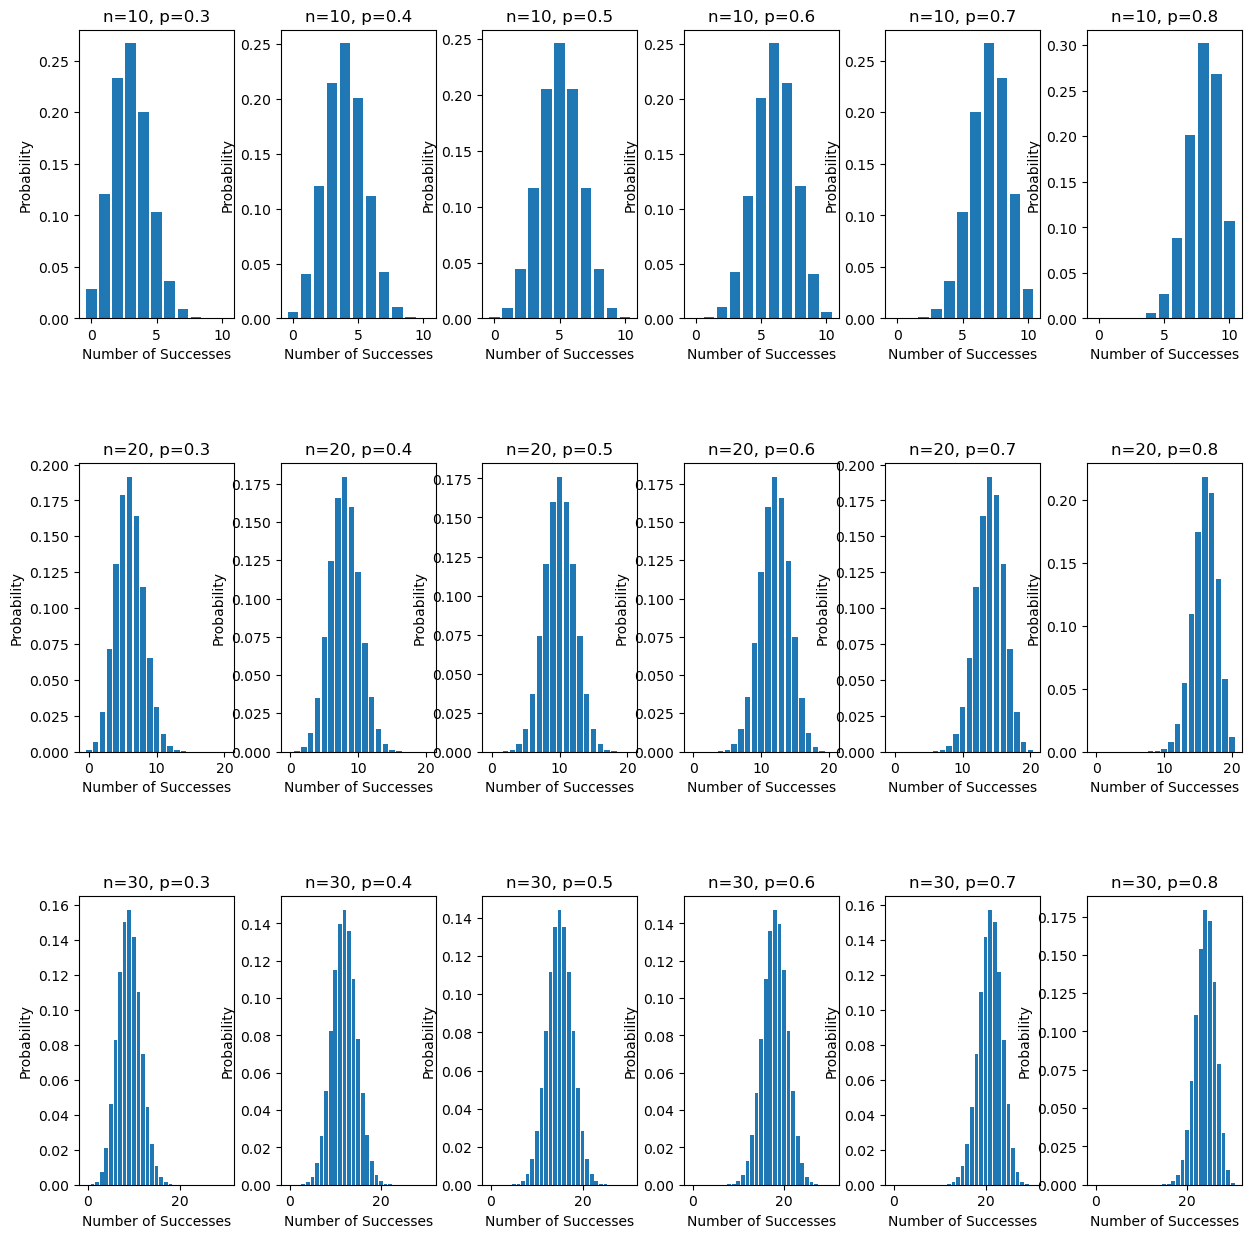

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
from scipy.special import comb
from scipy.stats import binom

def calculate_binomial_distribution_the_manual_way(n, p):
    probabilities = [0] * (n + 1)  # initialize the list of probabilities with 0s - size n + 1
    probabilities[0] = (1 - p) ** n # calculate the probability of 0 successes
    
    for k in range(1, n + 1):
        # Use the previous probability to calculate the current one - It's derived from the binomial distribution formula and binomial coefficient.
        probabilities[k] = probabilities[k - 1] * p * (n - k + 1) / ((1 - p) * k)
    
    return probabilities

def calculate_binomial_distribution(n, p):
    probabilities = [binom.pmf(k, n, p) for k in range(n + 1)]
    return probabilities

# Define a list of trials and probabilities
n_values = [10, 20, 30]
p_values = [0.3,0.4,0.5,0.6,0.7,0.8]

# Create subplots
fig, axes = plt.subplots(len(n_values), len(p_values), figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, n in enumerate(n_values):
    for j, p in enumerate(p_values):
        probabilities = calculate_binomial_distribution(n, p)
        axes[i, j].bar(range(n + 1), probabilities)
        axes[i, j].set_xlabel('Number of Successes')
        axes[i, j].set_ylabel('Probability')
        axes[i, j].set_title(f'n={n}, p={p}')

plt.show()

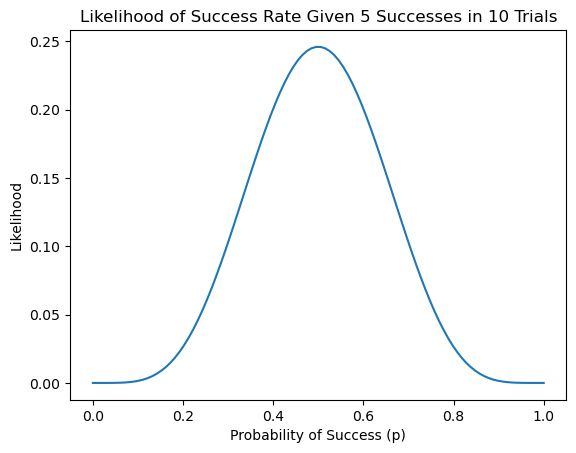

In [4]:
# Execute Binomial distribution formula to calculate likelihood of success rate given fixed number of successes and trials
# This shows a curve that is proportional to the beta distribution but the area under the curve does not 
# necessarily sum to 1 because it is not a probability distribution.
# The Beta distribution is a conjugate prior to the Binomial distribution in Bayesian statistics.
# If you have a beta prior and a binomial likelihood, the posterior distribution is also a beta distribution.
# GitHub Copilot: Yes, you're correct. The likelihood function for the binomial distribution, given the observed data, is indeed proportional 
# to the Beta distribution. 
# The Beta distribution is a conjugate prior distribution for the binomial distribution in Bayesian statistics. 
# This means that if you have a Beta prior for the probability of success `p`, and you observe some data from a binomial distribution, 
# the posterior distribution for `p` is also a Beta distribution.
# However, the likelihood function you're calculating is not normalized like a probability distribution. 
# The area under the curve of the likelihood function does not necessarily add up to 1. On the other hand, the Beta distribution 
# is a probability distribution, and it is normalized so that the total probability is 1.
# So while the shapes of the likelihood function and the Beta distribution might look similar, they are used 
# in different ways. The likelihood function is used to estimate the parameter `p` that maximizes the likelihood of observing 
# the given data, while the Beta distribution can be used to represent a probabilistic statement about `p` before or after observing the data.

def likelihood(p, k, n):
    return comb(n, k) * (p ** k) * ((1 - p) ** (n - k)) # Binomial distribution formula

# Fixed number of successes and trials
k = 5
n = 10

# Range of success probabilities
p_values = np.linspace(0, 1, 100)

# Calculate likelihood for each success probability
likelihood_values_manual = [likelihood(p, k, n) for p in p_values]
# Calculate likelihood for each success probability
likelihood_values = [binom.pmf(k, n, p) for p in p_values]

plt.plot(p_values, likelihood_values)
plt.xlabel('Probability of Success (p)')
plt.ylabel('Likelihood')
plt.title(f'Likelihood of Success Rate Given {k} Successes in {n} Trials')
plt.show()  

In [7]:
from scipy.stats import binom

p = 1/5  # Probability of success
n = 7  # Number of trials

# Calculate the sum of probabilities for k > 1
result = sum(binom.pmf(k, n, p) for k in range(2, n + 1))

print(f"The probability P(X >= 2) is {result}")


# Calculate the cumulative probability for k > 1
result = 1 - binom.cdf(1, n, p)  # binom.cdf(k, n, p) calculates the cumulative probability for k <= the first argument

print(f"The probability P(X > 1) is {result}")



The probability P(X >= 2) is 0.4232832000000001
The probability P(X >= 2) is 0.4232832000000002


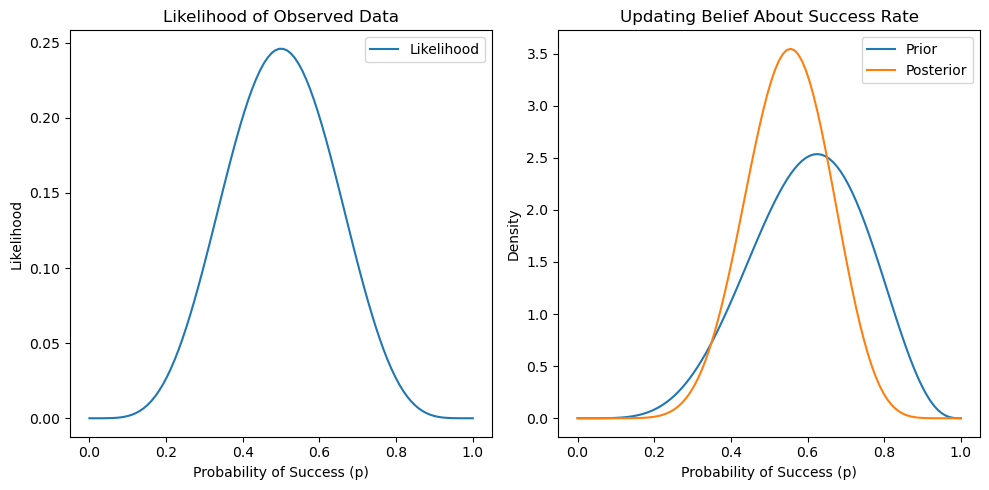

In [11]:
# digging into conjugate priors
from scipy.stats import binom, beta
import numpy as np
import matplotlib.pyplot as plt

# here is bayes in diachronic terms
#      Posterior       Likelihood        Prior       Normalizing constant
# P(belif | data) = P(data | belief) * P(belief) / P(data)

# Prior belief is that my free throw percentage is 60%
alpha_prior = 6
beta_prior = 4

# Observed data I just made 5 out of 10 free throws
n = 10
k = 5

# update with Posterior belief using new data
alpha_posterior = alpha_prior + k
beta_posterior = beta_prior + n - k

# Calculate likelihood for a range of success probabilities
p_values = np.linspace(0, 1, 100)
likelihood = binom.pmf(k, n, p_values)

# Calculate prior and posterior distributions
prior = beta.pdf(p_values, alpha_prior, beta_prior)
posterior = beta.pdf(p_values, alpha_posterior, beta_posterior)

# Plot likelihood
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(p_values, likelihood, label='Likelihood')
plt.title('Likelihood of Observed Data')
plt.xlabel('Probability of Success (p)')
plt.ylabel('Likelihood')
plt.legend()

# Plot prior and posterior
plt.subplot(1, 2, 2)
plt.plot(p_values, prior, label='Prior')
plt.plot(p_values, posterior, label='Posterior')
plt.title('Updating Belief About Success Rate')
plt.xlabel('Probability of Success (p)')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()